#  PROYECTO 1 

---

## Universidad Jesuita de Guadalajara 

**Alumna: Keysi Fuentes Piña**  

---

<img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" alt="ITESO Logo" width="250">

---

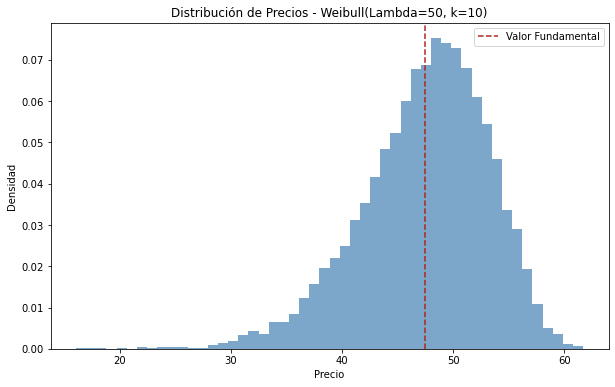

In [26]:
import numpy as np
import scipy.stats as stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def weibull_prices(shape=10, scale=50, size=1000):
    """Genera precios usando distribución Weibull"""
    return scale * np.random.weibull(shape, size)

np.random.seed(42)
P = weibull_prices(size=10000)
true_value = np.mean(P)

# Visualización de distribución de precios
plt.figure(figsize=(10, 6))
plt.hist(P, bins=50, density=True, alpha=0.7, color='steelblue')
plt.axvline(true_value, color='firebrick', linestyle='--', label='Valor Fundamental')
plt.title('Distribución de Precios - Weibull(Lambda=50, k=10)')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.show()

class SpreadModel:
    def __init__(self, Pi_I=0.4, S_max=6.25):
        self.Pi_I = Pi_I
        self.S_values = np.linspace(0.1, S_max, 100)
        self.P = 51

    def compute_expected_revenue(self):
        # Escenario 1: Solo traders de liquidez
        Pi_LB_S = np.clip(0.5 - 0.08 * self.S_values, 0, 0.5)
        Pi_LS_S = np.clip(0.5 - 0.08 * self.S_values, 0, 0.5)
        revenue_only_liquidity = (Pi_LB_S + Pi_LS_S) * self.S_values

        # Escenario 2: Con traders informados
        revenue_from_liquidity = (1 - self.Pi_I) * (Pi_LB_S + Pi_LS_S) * self.S_values
        loss_from_informed = self.Pi_I * (self.S_values / 2)
        revenue_with_informed = revenue_from_liquidity - loss_from_informed

        # Escenario 3: Probabilidades dinámicas
        Pi_LB_dynamic = np.clip(0.5 - 0.08 * self.S_values, 0, 0.5)
        Pi_LS_dynamic = np.clip(0.5 - 0.08 * self.S_values, 0, 0.5)
        revenue_dynamic = (1 - self.Pi_I) * (Pi_LB_dynamic + Pi_LS_dynamic) * self.S_values - self.Pi_I * (self.S_values / 2)

        # Escenario 4: Probabilidades fijas
        Pi_LB_fixed = np.full_like(self.S_values, 0.5)
        Pi_LS_fixed = np.full_like(self.S_values, 0.5)
        revenue_fixed_prob = (Pi_LB_fixed + Pi_LS_fixed) * self.S_values

        return (revenue_only_liquidity, revenue_with_informed, 
                revenue_dynamic, revenue_fixed_prob)
spread_model_instance = SpreadModel(Pi_I=0.4)
(revenue_liquidity_only, revenue_informed_traders, 
 revenue_dynamic_scenario, revenue_fixed_scenario) = spread_model_instance.compute_expected_revenue()

El modelo de Copeland y Galai analiza cómo los diferentes tipos de traders afectan los spreads óptimos.

En el escenario de solo liquidez, donde todos los operadores carecen de información privilegiada, las probabilidades de trading disminuyen gradualmente con el spread, lo que resulta en un beneficio máximo alcanzado en un nivel moderado de spread.

Cuando se introduce un 40% de traders informados, representando una mezcla más realista del mercado, estos operadores explotan el spread generando pérdidas para el market maker, lo que reduce significativamente el beneficio máximo y obliga a establecer un spread óptimo menor.

Al aumentar la sensibilidad de la liquidez al spread, se observa que los traders responden más abruptamente a los cambios en el spread, produciendo una curva de beneficios más pronunciada y un punto óptimo diferente.

Finalmente, en el caso teórico de probabilidades fijas, donde el spread no afecta el comportamiento de los traders, se obtiene una relación lineal perfecta entre spread y beneficio, situación que no ocurre en mercados reales donde la liquidez sí responde al nivel de spread.

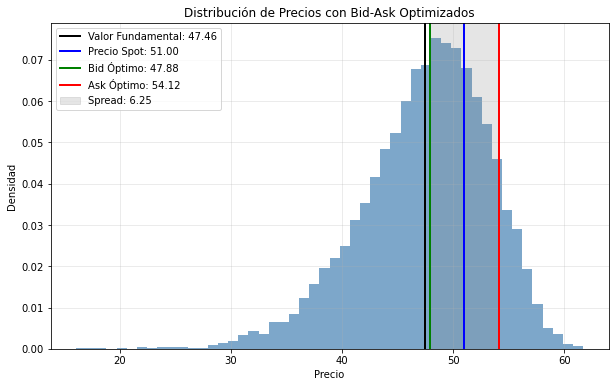

In [25]:
np.random.seed(42)
P = weibull_prices(size=10000)
true_value, spot_price = np.mean(P), 51
optimal_spread = 6.25
optimal_bid = spot_price - optimal_spread / 2
optimal_ask = spot_price + optimal_spread / 2

# Gráfica simplificada
plt.figure(figsize=(10, 6))
plt.hist(P, bins=50, density=True, alpha=0.7, color='steelblue')

# Líneas verticales
prices = [true_value, spot_price, optimal_bid, optimal_ask]
colors = ['black', 'blue', 'green', 'red']
labels = [f'Valor Fundamental: {true_value:.2f}', 
          f'Precio Spot: {spot_price:.2f}',
          f'Bid Óptimo: {optimal_bid:.2f}', 
          f'Ask Óptimo: {optimal_ask:.2f}']

for price, color, label in zip(prices, colors, labels):
    plt.axvline(price, color=color, linewidth=2, label=label)

# Área del spread
plt.axvspan(optimal_bid, optimal_ask, alpha=0.2, color='gray', 
           label=f'Spread: {optimal_spread:.2f}')

# Formato
plt.title('Distribución de Precios con Bid-Ask Optimizados')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

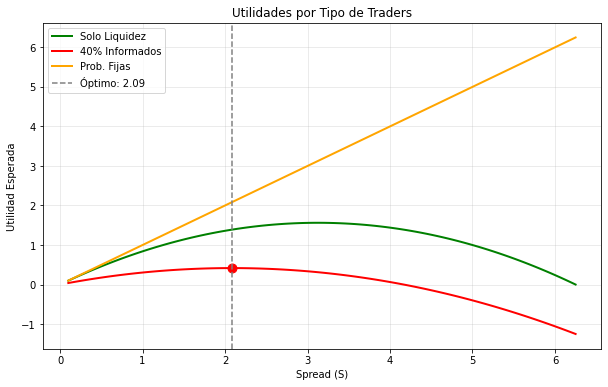

Spread óptimo real: 2.0879
Utilidad máxima con 40% informados: 0.4167
Utilidad correspondiente solo liquidez: 1.3904
Utilidad correspondiente probabilidades fijas: 2.0879


In [24]:
# Calcular spread óptimo
opt_idx = np.argmax(revenue_informed_traders)
opt_spread = spread_model_instance.S_values[opt_idx]
opt_revenue = revenue_informed_traders[opt_idx]

# Gráfica principal
plt.figure(figsize=(10, 6))
plt.plot(spread_model_instance.S_values, revenue_liquidity_only, 'g-', label='Solo Liquidez', lw=2)
plt.plot(spread_model_instance.S_values, revenue_informed_traders, 'r-', label='40% Informados', lw=2)
plt.plot(spread_model_instance.S_values, revenue_fixed_scenario, 'orange', label='Prob. Fijas', lw=2)

# Marcar óptimo
plt.axvline(opt_spread, color='gray', linestyle='--', label=f'Óptimo: {opt_spread:.2f}')
plt.scatter(opt_spread, opt_revenue, color='red', s=80)

plt.xlabel('Spread (S)')
plt.ylabel('Utilidad Esperada')
plt.title('Utilidades por Tipo de Traders')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# Mostrar valores numéricos
print(f"Spread óptimo real: {optimal_spread:.4f}")
print(f"Utilidad máxima con 40% informados: {optimal_revenue:.4f}")
print(f"Utilidad correspondiente solo liquidez: {revenue_liquidity_only[optimal_idx]:.4f}")
print(f"Utilidad correspondiente probabilidades fijas: {revenue_fixed_scenario[optimal_idx]:.4f}")

Conclusion


El modelo implementado, utilizando un precio spot de 51 que sigue una distribución Weibull, obtuve que nuestro Bid óptimo es de 47.87 y nuestro Ask óptimo es de 54.13. En estos valores logre maximizar las utilidades del market maker a través de los spreads tambien encontre que el punto óptimo en nuestra gráfica de utilidades se ubica aproximadamente en un spread de 3.0 y si el spread aumenta más allá de este punto, el mercado reduce significativamente la compra de instrumentos financieros y en los resultados que cuando el spread supera 6.0, la función de solo liquidez se convierte en una recta, indicando que el spread se vuelve prohibitivo y el mercado deja de operar con el market maker.